<a href="https://colab.research.google.com/github/devreborges/Estudos-em-Python/blob/main/Projeto_trelloipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados.


# Demanda 1 - Determinar os valores médios de aluguel por tipo de imóvel

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# URL do arquivo CSV
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"

# Importar o arquivo CSV diretamente da URL
df_aluguel = pd.read_csv(url, sep=';')
df_aluguel



,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [ ]:
quantidade_por_tipo = df_aluguel['Tipo'].value_counts()


In [ ]:
media_por_tipo = df_aluguel.groupby('Tipo')['Valor'].mean()
print(media_por_tipo)


Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

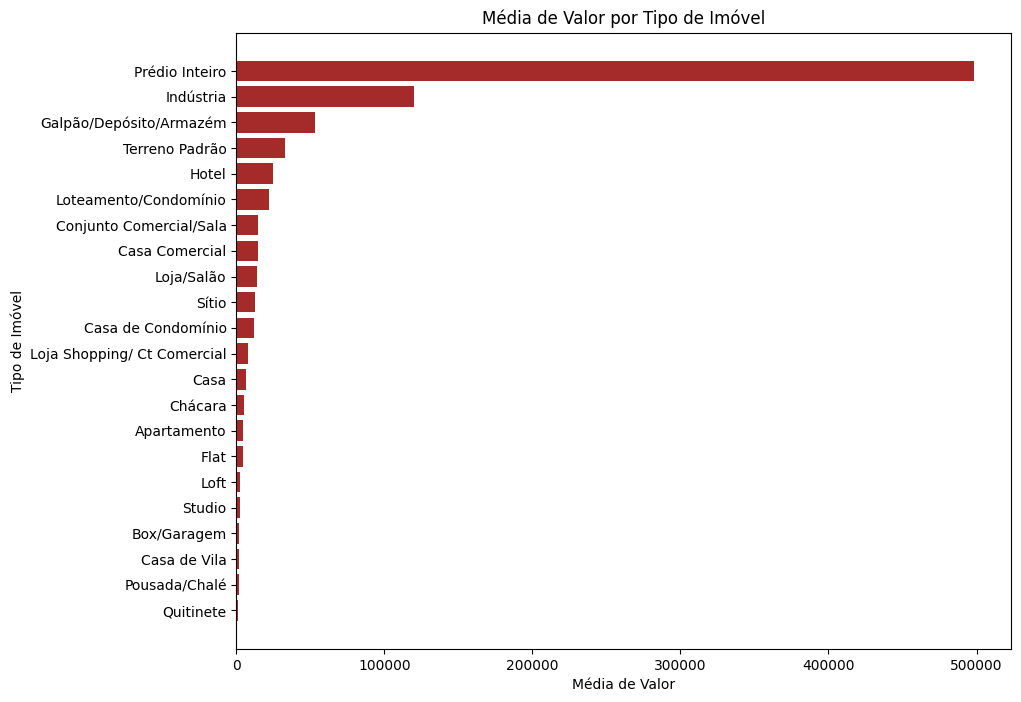

In [ ]:
# Ordenar as médias por tipo de imóvel
media_por_tipo_sorted = media_por_tipo.sort_values()

# Criar um gráfico de barras horizontais com as médias por tipo de imóvel
plt.figure(figsize=(10, 8))
plt.barh(media_por_tipo_sorted.index, media_por_tipo_sorted.values, color='brown')

# Adicionar título e rótulos aos eixos
plt.title('Média de Valor por Tipo de Imóvel')
plt.xlabel('Média de Valor')
plt.ylabel('Tipo de Imóvel')

# Exibir o gráfico
plt.show()


# Demanda 2 - Determinar percentual de cada tipo de imóvel presente na base de dados

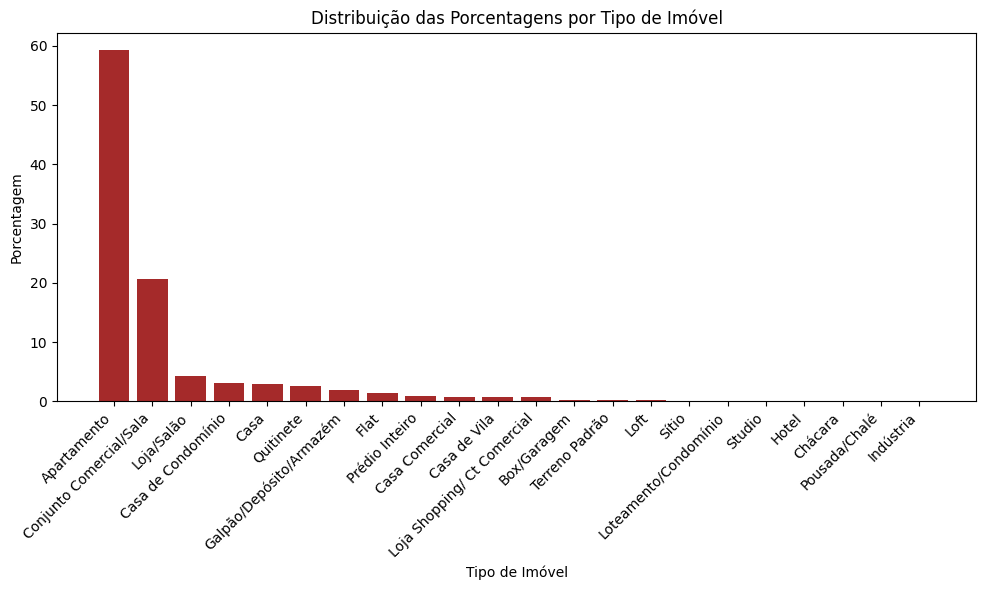

In [ ]:
porcentagem_por_tipo = df_aluguel['Tipo'].value_counts(normalize=True) * 100
# Criar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
plt.bar(porcentagem_por_tipo.index, porcentagem_por_tipo.values, color='brown')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição das Porcentagens por Tipo de Imóvel')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Porcentagem')

# Girar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Removendo imóveis comerciais e limpando os dados


In [ ]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [ ]:
df_aluguel.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [ ]:
df_aluguel.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
df_residencial = df_aluguel.query('@imoveis_comerciais not in Tipo')
df_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [ ]:
df_residencial.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

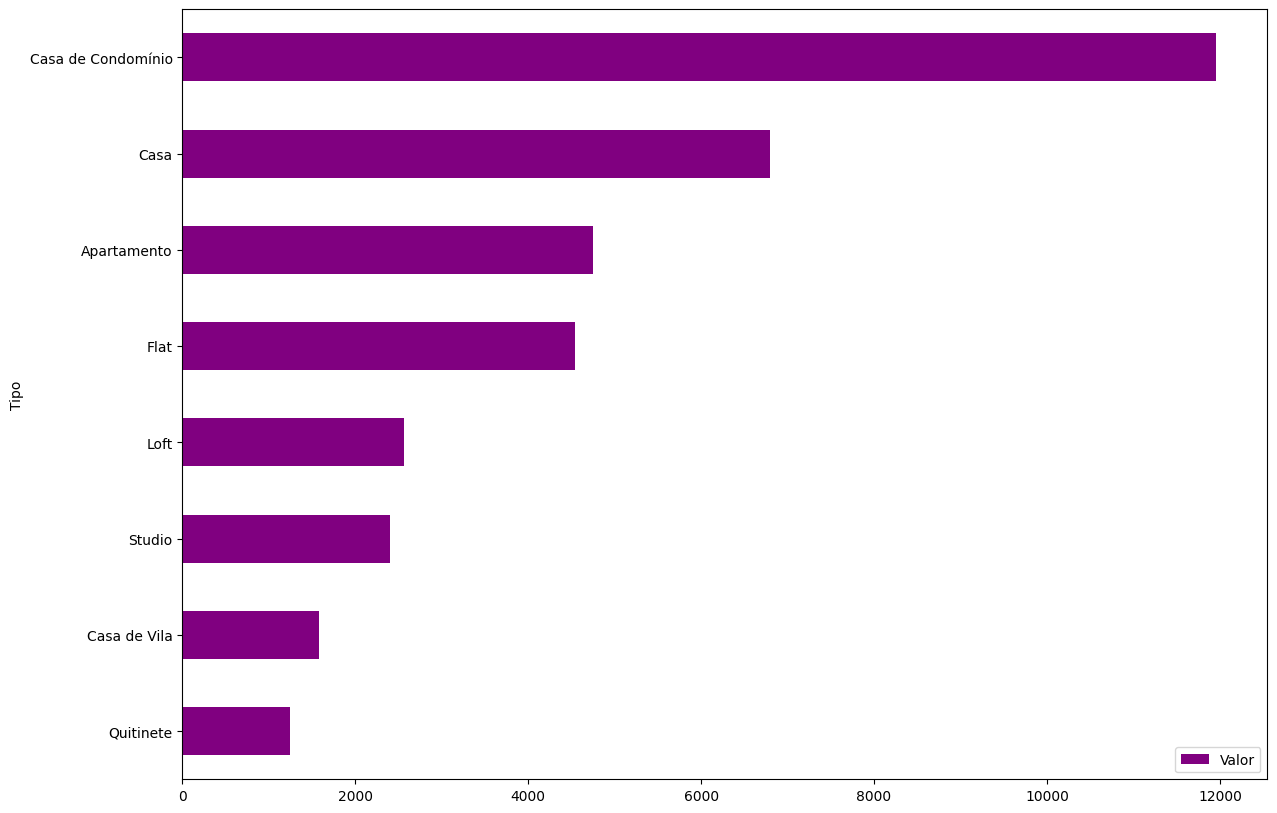

In [ ]:
df_preco_tipo = df_residencial.groupby("Tipo")[["Valor"]].mean().sort_values("Valor")

df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');


In [ ]:
#normalize=True apresenta uma contagem de value_counts em porcentagem
df_residencial.Tipo.value_counts(normalize=True)

Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: Tipo, dtype: float64

In [ ]:
#to_frame() transforma uma series em um dataframe e sort_values('Tipo') organiza a coluna tipo em ordem crescente.
df_residencial.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

,Tipo
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


In [ ]:
apartamento = ['Apartamento']
df_apartamento = df_residencial.query('@apartamento in Tipo')
df_apartamento.Tipo.value_counts()

Apartamento    19532
Name: Tipo, dtype: int64

# Gerando os primeiros insights

1) Calcular a média de quartos por apartamento;

2) Conferir quantos bairros únicos existem na nossa base de dados;

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas

In [ ]:
print('Média de quartos por apartamento')
df_apartamento.Quartos.mean()

Média de quartos por apartamento


2.481568707761622

In [ ]:
print('Quantos bairros únicos existem na nossa base de dados;')
len(df_apartamento.Bairro.unique())

Quantos bairros únicos existem na nossa base de dados;


149

In [ ]:
#Limpando dados cujo o valor era nulo
df_apartamento_sem_nulos = df_apartamento.dropna(subset=['Valor'])
df_apartamento_sem_nulos.Valor.unique()



array([8.0000e+02, 1.2000e+03, 1.3000e+03, 1.5000e+03, 2.0000e+03,
       1.3000e+04, 9.5000e+02, 1.7000e+03, 1.9000e+03, 1.0000e+03,
       7.0000e+03, 7.5000e+02, 4.2000e+03, 2.5000e+03, 1.0000e+04,
       5.5000e+03, 2.3000e+03, 3.9000e+03, 3.5000e+03, 1.8000e+03,
       5.0000e+03, 4.5000e+03, 3.0000e+03, 2.6000e+03, 2.3500e+03,
       4.0000e+03, 1.4000e+03, 1.6000e+03, 6.5000e+03, 1.8000e+04,
       3.2000e+03, 1.5500e+03, 5.9500e+03, 1.8500e+03, 8.0000e+03,
       7.9000e+03, 1.2700e+04, 2.8000e+03, 2.7000e+03, 1.1000e+03,
       1.4500e+03, 2.7500e+03, 2.4000e+03, 4.3000e+03, 1.3900e+04,
       7.5000e+03, 2.5000e+04, 1.3500e+03, 3.3500e+03, 9.0000e+02,
       6.2000e+03, 4.0000e+04, 2.2000e+03, 6.5000e+04, 8.9900e+02,
       3.6000e+03, 1.5000e+04, 2.2000e+04, 3.3000e+03, 3.7000e+03,
       3.0000e+04, 9.0000e+03, 1.7500e+04, 1.7000e+04, 3.8000e+03,
       1.2000e+04, 8.5000e+03, 8.6000e+03, 7.9000e+02, 8.5000e+02,
       4.3150e+03, 5.7000e+03, 3.9900e+03, 1.1000e+04, 6.0000e

In [ ]:
df_quantidade_por_bairros = df_apartamento_sem_nulos['Bairro'].value_counts().sort_index().values
df_quantidade_por_bairros

array([  10,    3,    4,   92,   56,   13,    3,   10, 3340,    3,    5,
         10,   57,  787,   16,  130,    3,    1,   40,   13,  319,   28,
        117,    8,    2,  204,    1,    9,    2,    1,    5, 2464,    6,
         26,   10,   62,   23,   11,   98,    7,   64,   20,  647,    4,
        397,    2,    4,    9,   76,  136,    1,   18,    4,  179,   21,
          7,  149,    8,   24,    7,    2, 1768,   68,   21,    3,  226,
          3,    3,  210,    7,   64,   23,    7,    1,  487,   22,  389,
          3, 1241,  221,   41,   40,    2,  117,    8,    9,    7,  234,
         32,   10,    4,    3,    4,    1,   12,  184,    9,   35,   12,
         40,   22,   15,    2,   11,    2,   76,   41,   21,   21,   16,
       1490,   32,    3,    3,   75,   19,   20,    8,    6,   87,    4,
          6,    1,   15,  233,   57,   27,   23,  131,    7, 1059,   47,
         16,    4,   56,    5,    9,   24,   21,   12,    4,    3,  277,
          9,   36,   92,   18,    2,    8])

In [ ]:
df_soma_por_bairro = df_apartamento_sem_nulos.groupby('Bairro')['Valor'].sum().reset_index().sort_index()
df_soma_por_bairro


,Bairro,Valor
0,Abolição,10150.0
1,Alto da Boa Vista,4450.0
2,Anchieta,2840.0
3,Andaraí,130547.0
4,Anil,82960.0
...,...,...
144,Vila Valqueire,53160.0
145,Vila da Penha,106290.0
146,Vista Alegre,19630.0
147,Zumbi,4300.0


In [ ]:
df_soma_por_bairro['Quantidade'] = df_quantidade_por_bairros
df_soma_por_bairro['Media'] = (df_soma_por_bairro.Valor / df_quantidade_por_bairros)
df_medias = df_soma_por_bairro
df_medias

,Bairro,Valor,Quantidade,Media
0,Abolição,10150.0,10,1015.000000
1,Alto da Boa Vista,4450.0,3,1483.333333
2,Anchieta,2840.0,4,710.000000
3,Andaraí,130547.0,92,1418.989130
4,Anil,82960.0,56,1481.428571
...,...,...,...,...
144,Vila Valqueire,53160.0,36,1476.666667
145,Vila da Penha,106290.0,92,1155.326087
146,Vista Alegre,19630.0,18,1090.555556
147,Zumbi,4300.0,2,2150.000000


In [ ]:
#Limpando os dados, consinderando para média apenas os bairros onde a quantidade de alugueis seja igual e superior a 100 e organziando o roll em ordem decrescente das médias.
df_medias_limpas = df_medias.query('Quantidade >= 100')
df_medias_limpas_ordenado = df_medias_limpas.sort_values('Media', ascending=False)
display(df_medias_limpas_ordenado)

,Bairro,Valor,Quantidade,Media
61,Ipanema,16773379.0,1768,9487.205317
13,Botafogo,7373566.0,787,9369.207116
78,Leblon,10719462.0,1241,8637.761483
74,Lagoa,3927073.0,487,8063.804928
124,São Conrado,1831350.0,233,7859.871245
8,Barra da Tijuca,18660089.0,3340,5586.852994
68,Jardim Botânico,1011880.0,210,4818.476190
53,Gávea,806493.0,179,4505.547486
42,Flamengo,2894028.0,647,4472.995363
31,Copacabana,10958535.0,2464,4447.457386


In [ ]:
print('Tamanho do roll de dados ordenados')
len(df_medias_limpas_ordenado)

Tamanho do roll de dados ordenados


27

In [ ]:
print('Como o roll está ordenado, aqui está o top 10 dos bairros com maiores médias')
display(df_medias_limpas_ordenado.head(10))

Como o roll está ordenado, aqui está o top 10 dos bairros com maiores médias


,Bairro,Valor,Quantidade,Media
61,Ipanema,16773379.0,1768,9487.205317
13,Botafogo,7373566.0,787,9369.207116
78,Leblon,10719462.0,1241,8637.761483
74,Lagoa,3927073.0,487,8063.804928
124,São Conrado,1831350.0,233,7859.871245
8,Barra da Tijuca,18660089.0,3340,5586.852994
68,Jardim Botânico,1011880.0,210,4818.476190
53,Gávea,806493.0,179,4505.547486
42,Flamengo,2894028.0,647,4472.995363
31,Copacabana,10958535.0,2464,4447.457386


In [ ]:
top_cinco_bairros_maiores_medias = df_medias_limpas_ordenado.head(5)
top_cinco_bairros_maiores_medias

,Bairro,Valor,Quantidade,Media
61,Ipanema,16773379.0,1768,9487.205317
13,Botafogo,7373566.0,787,9369.207116
78,Leblon,10719462.0,1241,8637.761483
74,Lagoa,3927073.0,487,8063.804928
124,São Conrado,1831350.0,233,7859.871245


In [ ]:
tabela_top_cinco_bairro_e_media = top_cinco_bairros_maiores_medias[['Bairro','Media']]
tabela_top_cinco_bairro_e_media

,Bairro,Media
61,Ipanema,9487.205317
13,Botafogo,9369.207116
78,Leblon,8637.761483
74,Lagoa,8063.804928
124,São Conrado,7859.871245


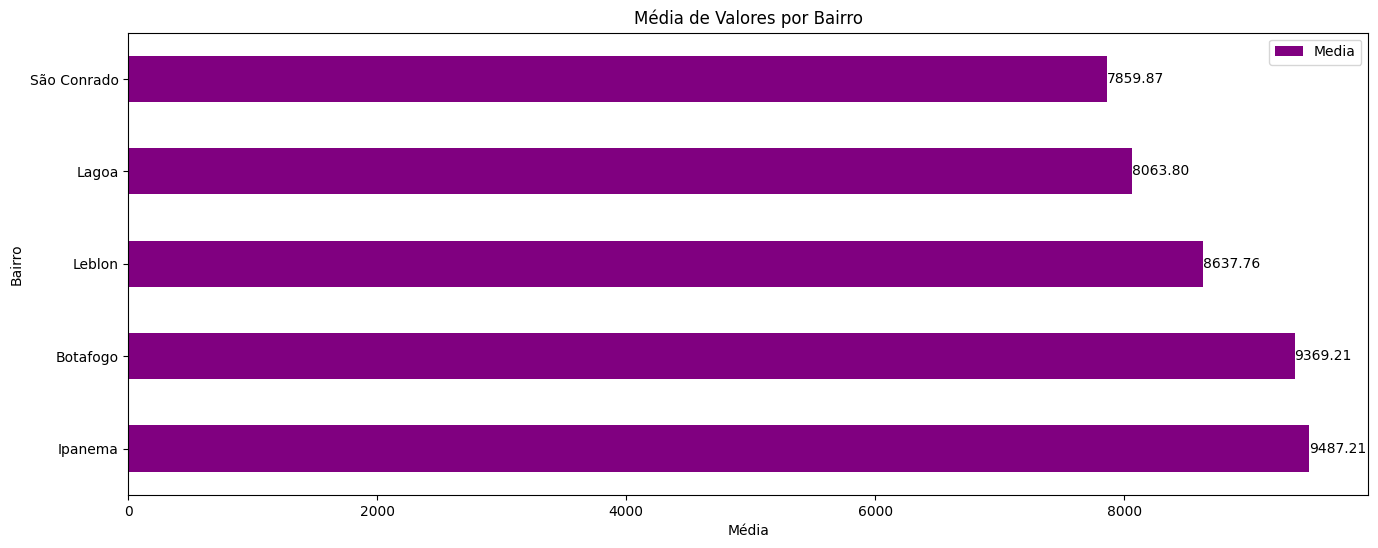

In [ ]:
# Ordenar o DataFrame em ordem decrescente pela coluna 'Media'
tabela_top_cinco_bairro_e_media_ordenado = tabela_top_cinco_bairro_e_media.sort_values('Media', ascending=False)

# Criar o gráfico de barras horizontais com a cor lilás
ax = tabela_top_cinco_bairro_e_media_ordenado.plot(x='Bairro', y='Media', kind='barh', color='purple', figsize=(16, 6))

# Adicionar rótulos e título
plt.xlabel('Média')
plt.ylabel('Bairro')
plt.title('Média de Valores por Bairro')

# Adicionar os valores numéricos em cada barra com 2 casas decimais
for i, v in enumerate(tabela_top_cinco_bairro_e_media_ordenado['Media']):
    ax.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')

# Exibir o gráfico
plt.show()

# Aplicando filtros

1.Apartamentos que possuem 1quarto e aluguel menor que R$ 1200

2.Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70m²

**1.Apartamentos que possuem 1quarto e aluguel menor que R$ 1200**


In [ ]:
df_apartamento

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
df_apartamento.drop('Tipo', axis=1, inplace=True)


<ipython-input-54-1f333fc62bde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamento.drop('Tipo', axis=1, inplace=True)


In [ ]:
df_apartamento

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Méier,2,0,0,70,900.0,490.0,48.0
32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
df_selecao1 = df_apartamento.query('Quartos == 1 & Valor < 1200')
df_selecao1

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32643,Guadalupe,1,0,0,40,550.0,NaN,NaN
32666,Bonsucesso,1,0,0,60,1000.0,NaN,NaN
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


**2.Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70m²**

In [ ]:
df_selecao2 = df_apartamento.query('Quartos >= 2 & Valor < 3000 & Area > 70')
df_selecao2

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,NaN
32,Botafogo,2,1,0,76,2500.0,740.0,NaN
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,NaN
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN


# Salvando o arquivo para enviar para o time de machine learning

In [ ]:
df_apartamento.to_csv('dados_apartamentos.csv', index=False, sep = ';')

In [ ]:
#lendo o arquivo para chegar se está tudo ok, especificando o separador  sep = ';'
pd.read_csv('dados_apartamentos.csv', sep = ';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...
19527,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
19528,Méier,2,0,0,70,900.0,490.0,48.0
19529,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
19530,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
